# Robótica Computacional

#### Guilherme Zaborowsky Graicer e Eduardo Tirta Prawita

# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import math
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240L, 320L, 3L)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240L, 320L)

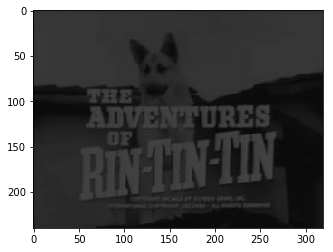

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

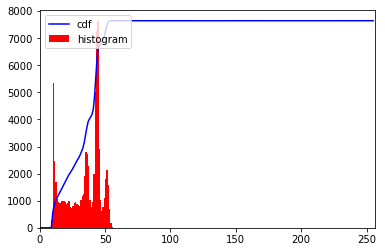

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

#### 1) Não, de acordo com o histograma, vemos que a concentração de cores está mais voltada ao 0, o que representa maior quantidade da cor preta, deixando a imagem escura. Para aproveitar mais as faixas de cores, deve ter um distribuição do zero até o 250, e assim, apresenta maior qualidade de imagem.

In [8]:
rin_equal=cv2.equalizeHist(rintin_gray)

In [9]:
rintin_equal = rintin_gray
rintin_equal *= (255 / rintin_gray.max()) 

### Utilizando a função equalize

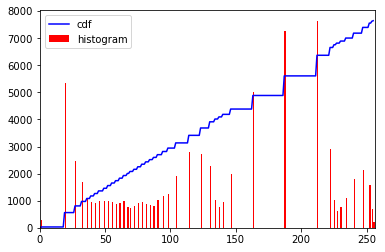

In [10]:

hist,bins = np.histogram(rin_equal.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rin_equal.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

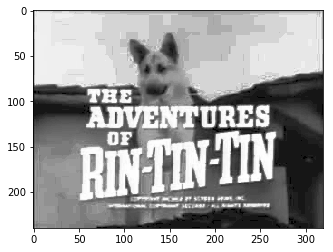

In [11]:
plt.imshow(rin_equal, cmap="Greys_r", vmin=0, vmax=255)

### Utilizando função própria

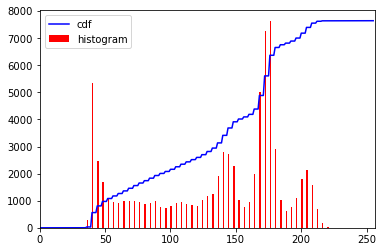

In [12]:
hist,equalbins = np.histogram(rintin_equal.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_equal.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

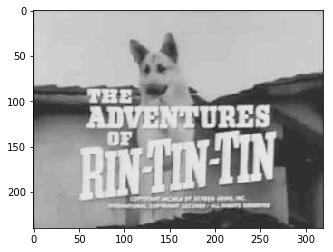

In [13]:
plt.imshow(rintin_equal, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


##### 1) Não, já que a cor branca, possui alto indice dos canais R e B

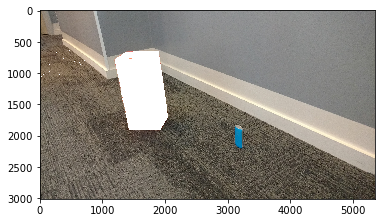

In [22]:
image = "hall_box_battery1.jpg"
image = cv2.imread(image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for i in range(len(image_rgb)):
    for k in range(len(image_rgb[i])):
        r,g,b = image_rgb[i][k]
        if (r>230 and b<150 and g<150):
            image_rgb[i][k][0] = 255
            image_rgb[i][k][1] = 255
            image_rgb[i][k][2] = 255
        if (r>120 and b<100 and g<100):
            image_rgb[i][k][0] = 255
            image_rgb[i][k][1] = 255
            image_rgb[i][k][2] = 255
            
#r-g >110 and r-b >125 and math.fabs(b-g)>150  (código simples mas com defeitos na parede)
            
plt.imshow(image_rgb, vmin=0, vmax=255)